In [31]:
import os 
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import math


### Main functionality 
1. read the landmark zip codes from the csv file. 
2. read the hourly data which is processed for VAR model: get the stations ID from this dataframe. 
3. read the raw data; extract station id and station location (longitude/latitude) information 
  - for all stations, using (long,lat) extract the zip codes 
  - merge the zip codes and landmark dataframes so that all the info is in just one dataframe. 
4. Now use dataframe from step 2, i.e. VAR model processed, and dataframe with zip codes and # of landmarks to extract those stations which are present in df from step 2. 
5. Now we have station ID and corresponding number of landmarks for that station. 
   - this is static data for this particular case.  
6. The VAR data has only 200 stations selected randomly from all the stations. 

In [32]:
df_landmark_zip = pd.read_csv('/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/DivvyBikes/data-from-cdl-students/landmark_clean.csv', 
                              usecols=['zip_code','landmarks'])
df_landmark_zip.columns

Index(['zip_code', 'landmarks'], dtype='object')

In [33]:
df_stations = pd.read_csv('/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/DivvyBikes/df2021-8-9-10_VAR.csv', 
                          index_col='date')
stations = pd.Series(df_stations.columns)
df_station_id = pd.DataFrame(stations.rename("start_station_id"))
df_station_id["start_station_id"]  = df_station_id["start_station_id"].str.replace("_checkout","")
df_station_id

,start_station_id
0,13001
1,13006
2,13008
3,13011
4,13016
...,...
195,16907
196,16912
197,16913
198,16915


In [34]:
df_station_id[df_station_id.start_station_id=="13075"]

,start_station_id
27,13075


In [35]:
df_full = pd.read_csv('/Users/raman/JupyterNotebooks/Comparison_Multivariate/dataset/DivvyBikes/data-from-cdl-students/202108-divvy-tripdata_raw.csv',
                      low_memory=False,
                      usecols=['start_station_id','start_lat', 'start_lng']
                       )

In [36]:
df_full[df_full.start_station_id=='13075']

,start_station_id,start_lat,start_lng
22968,13075,41.853085,-87.631931
26032,13075,41.853144,-87.631853
26033,13075,41.853085,-87.631931
26035,13075,41.853085,-87.631931
26345,13075,41.853200,-87.631851
...,...,...,...
761531,13075,41.853085,-87.631931
761533,13075,41.853085,-87.631931
761538,13075,41.853085,-87.631931
761540,13075,41.853085,-87.631931


In [37]:
df_full = df_full.dropna()
df_full_skimmed  = df_full.groupby(['start_station_id']).median()
df_full_skimmed.shape

(726, 2)

In [38]:
df_full_skimmed[df_full_skimmed.index=='13075']

,start_lat,start_lng
start_station_id,,
13075,41.853085,-87.631931


In [39]:
import pandas as pd
from geopy.geocoders import Nominatim
# Initialize Nominatim API
geolocator = Nominatim(user_agent="Divvy-Bikes-Stations")

# Function to get zip code from lat-long
def get_zipcode(location_):
    try:
        location = geolocator.reverse(location_)
        return location.raw['address']['postcode']
    except:
        return None

df_full_skimmed['lat_lng'] = df_full_skimmed.apply(lambda row: f"{row['start_lat']}, {row['start_lng']}", axis=1)

    


In [40]:
df_full_skimmed

,start_lat,start_lng,lat_lng
start_station_id,,,
13001,41.883984,-87.624684,"41.8839840647265, -87.6246839761734"
13006,41.882664,-87.632530,"41.882664, -87.63253"
13008,41.881032,-87.624084,"41.8810317, -87.62408432"
13011,41.879255,-87.639904,"41.879255, -87.639904"
13016,41.894345,-87.622798,"41.89434513742426, -87.62279838323593"
...,...,...,...
TA1309000066,41.969090,-87.674237,"41.96909, -87.674237"
TA1309000067,41.803038,-87.606615,"41.803038, -87.606615"
WL-008,41.867118,-87.641088,"41.8671177825, -87.6410879593"


In [41]:
df_full_skimmed['zip_code'] = df_full_skimmed.apply(lambda row: get_zipcode(row['lat_lng']), axis=1)

In [50]:
df_full_skimmed[df_full_skimmed.index=='13075'].fillna(60602)

,start_lat,start_lng,lat_lng,zip_code
start_station_id,,,,
13075,41.853085,-87.631931,"41.85308455741279, -87.63193130493164",60602


In [55]:
df_full_skimmed

,start_lat,start_lng,lat_lng,zip_code
start_station_id,,,,
13001,41.883984,-87.624684,"41.8839840647265, -87.6246839761734",60602
13006,41.882664,-87.632530,"41.882664, -87.63253",60696
13008,41.881032,-87.624084,"41.8810317, -87.62408432",60602
13011,41.879255,-87.639904,"41.879255, -87.639904",60606
13016,41.894345,-87.622798,"41.89434513742426, -87.62279838323593",60611
...,...,...,...,...
TA1309000066,41.969090,-87.674237,"41.96909, -87.674237",60640
TA1309000067,41.803038,-87.606615,"41.803038, -87.606615",60615
WL-008,41.867118,-87.641088,"41.8671177825, -87.6410879593",60607


In [62]:
df_full_skimmed

,start_lat,start_lng,lat_lng,zip_code
start_station_id,,,,
13001,41.883984,-87.624684,"41.8839840647265, -87.6246839761734",60602
13006,41.882664,-87.632530,"41.882664, -87.63253",60696
13008,41.881032,-87.624084,"41.8810317, -87.62408432",60602
13011,41.879255,-87.639904,"41.879255, -87.639904",60606
13016,41.894345,-87.622798,"41.89434513742426, -87.62279838323593",60611
...,...,...,...,...
TA1309000066,41.969090,-87.674237,"41.96909, -87.674237",60640
TA1309000067,41.803038,-87.606615,"41.803038, -87.606615",60615
WL-008,41.867118,-87.641088,"41.8671177825, -87.6410879593",60607


In [63]:
df_full_skimmed.dropna()

,start_lat,start_lng,lat_lng,zip_code
start_station_id,,,,
13001,41.883984,-87.624684,"41.8839840647265, -87.6246839761734",60602
13006,41.882664,-87.632530,"41.882664, -87.63253",60696
13008,41.881032,-87.624084,"41.8810317, -87.62408432",60602
13011,41.879255,-87.639904,"41.879255, -87.639904",60606
13016,41.894345,-87.622798,"41.89434513742426, -87.62279838323593",60611
...,...,...,...,...
TA1309000066,41.969090,-87.674237,"41.96909, -87.674237",60640
TA1309000067,41.803038,-87.606615,"41.803038, -87.606615",60615
WL-008,41.867118,-87.641088,"41.8671177825, -87.6410879593",60607


In [64]:
df_full_skimmed_ = df_full_skimmed.dropna()

In [65]:
df_full_skimmed_['zip_code']  = df_full_skimmed_['zip_code'].astype(int) 

/var/folders/y_/ckryxn657xd1sjqy61rgk5q80000gn/T/ipykernel_1056/1508681973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full_skimmed_['zip_code']  = df_full_skimmed_['zip_code'].astype(int)


In [66]:
df_full_skimmed_[df_full_skimmed_.index=='13075']

,start_lat,start_lng,lat_lng,zip_code
start_station_id,,,,


In [67]:
df_final = df_full_skimmed_.reset_index().merge(df_landmark_zip, on="zip_code", how='left')


In [68]:
df_final = df_final.set_index("start_station_id").drop(columns=['start_lat', 'start_lng', 'lat_lng', ]).fillna(0)

In [71]:
df_final = df_final.reset_index()


In [72]:
df_static = df_final[df_final.reset_index().start_station_id.isin(df_station_id.start_station_id)]

## which station id is missing 

In [73]:
set(df_station_id.start_station_id.to_list())  - set(df_final.start_station_id.to_list())

{'13075'}

In [74]:
missing_row = pd.DataFrame({'start_station_id': ['13075'], 'zip_code': [60647], 'landmarks':[5]}, index=[27])
top_=df_static[:27]
bottom_=df_static[27:]
df_static_no_missing = pd.concat([top_,missing_row, bottom_])

In [75]:
df_static_no_missing[df_static_no_missing.start_station_id=="13075"]

,index,start_station_id,zip_code,landmarks
27,NaN,13075,60647,5.0


In [76]:
# Write to a .npy file
np.save("divvy_static.npy", df_static_no_missing.landmarks.to_numpy())


In [77]:
np.load('divvy_static.npy').tolist()

[9.0,
 0.0,
 9.0,
 10.0,
 20.0,
 9.0,
 2.0,
 20.0,
 10.0,
 10.0,
 3.0,
 20.0,
 12.0,
 10.0,
 20.0,
 9.0,
 20.0,
 2.0,
 10.0,
 14.0,
 14.0,
 8.0,
 8.0,
 5.0,
 8.0,
 3.0,
 6.0,
 5.0,
 5.0,
 3.0,
 14.0,
 5.0,
 5.0,
 5.0,
 5.0,
 1.0,
 21.0,
 21.0,
 1.0,
 6.0,
 14.0,
 12.0,
 2.0,
 8.0,
 3.0,
 5.0,
 8.0,
 3.0,
 10.0,
 5.0,
 8.0,
 2.0,
 14.0,
 21.0,
 3.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0,
 21.0,
 5.0,
 5.0,
 5.0,
 12.0,
 14.0,
 14.0,
 14.0,
 8.0,
 3.0,
 2.0,
 10.0,
 21.0,
 14.0,
 21.0,
 21.0,
 8.0,
 8.0,
 3.0,
 8.0,
 8.0,
 5.0,
 5.0,
 5.0,
 8.0,
 8.0,
 8.0,
 2.0,
 5.0,
 5.0,
 5.0,
 5.0,
 15.0,
 12.0,
 5.0,
 2.0,
 2.0,
 14.0,
 14.0,
 3.0,
 3.0,
 5.0,
 5.0,
 3.0,
 3.0,
 5.0,
 8.0,
 14.0,
 12.0,
 12.0,
 5.0,
 5.0,
 2.0,
 8.0,
 8.0,
 10.0,
 5.0,
 10.0,
 20.0,
 10.0,
 21.0,
 10.0,
 5.0,
 8.0,
 8.0,
 12.0,
 10.0,
 14.0,
 20.0,
 9.0,
 10.0,
 8.0,
 3.0,
 5.0,
 21.0,
 21.0,
 4.0,
 14.0,
 12.0,
 5.0,
 20.0,
 20.0,
 20.0,
 2.0,
 2.0,
 7.0,
 10.0,
 10.0,
 10.0,
 21.0,
 10.0,
 10.0,
 10.0,
 10.0,
 1.0,
 

[*********************100%%**********************]  1 of 1 completed

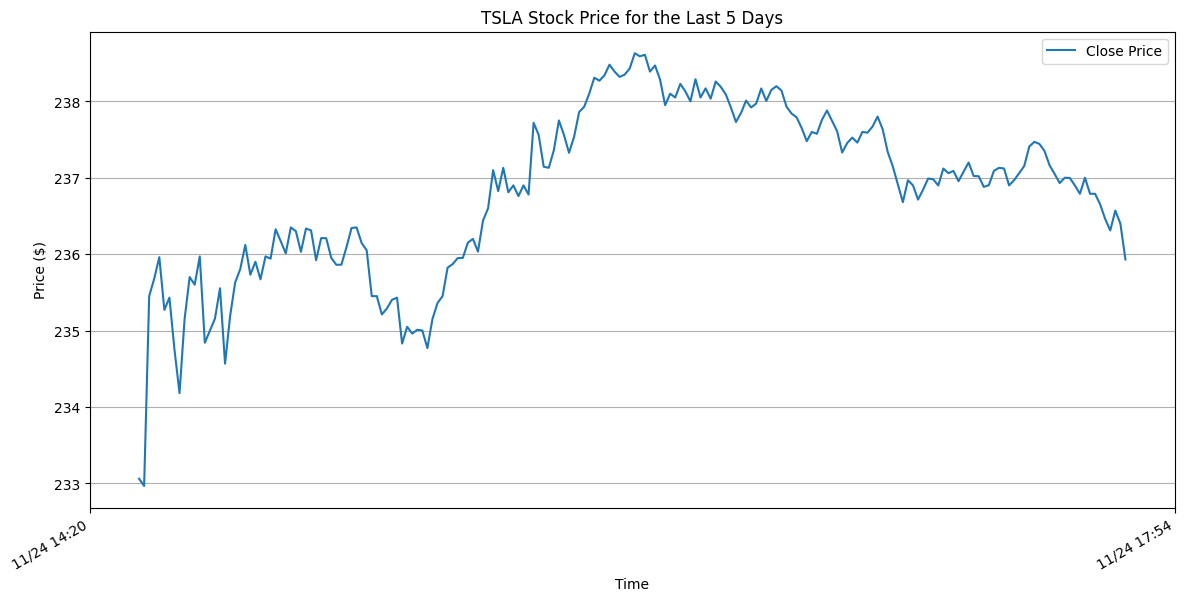

In [29]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download TSLA data for any two available days
tsla_data = yf.download('TSLA', start='2023-11-24', end='2023-11-25', interval='1m')  # Example dates

if not tsla_data.empty:
    # Set up the plot
    plt.figure(figsize=(14, 7))
    plt.plot(tsla_data.index, tsla_data['Close'], label='Close Price')

    # Formatting the date on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()  # Auto rotate date labels

    # Title and labels
    plt.title('TSLA Stock Price for the Last 5 Days')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data retrieved. Please check the ticker symbol and internet connection.")



In [30]:
tsla_data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-11-24 09:30:00-05:00,233.750000,234.210007,232.901001,233.059906,233.059906,1977471
2023-11-24 09:31:00-05:00,233.024094,233.179993,232.330002,232.964996,232.964996,567157
2023-11-24 09:32:00-05:00,232.951508,235.580002,232.899200,235.449997,235.449997,953344
2023-11-24 09:33:00-05:00,235.449997,235.970001,235.369995,235.679993,235.679993,705864
2023-11-24 09:34:00-05:00,235.649994,236.339905,235.330002,235.960007,235.960007,733263
...,...,...,...,...,...,...
2023-11-24 12:41:00-05:00,236.639999,236.699905,236.420105,236.459900,236.459900,311789
2023-11-24 12:42:00-05:00,236.440002,236.440002,236.270004,236.309998,236.309998,226397
2023-11-24 12:43:00-05:00,236.309998,236.597595,236.300003,236.570007,236.570007,212559


[*********************100%%**********************]  1 of 1 completed


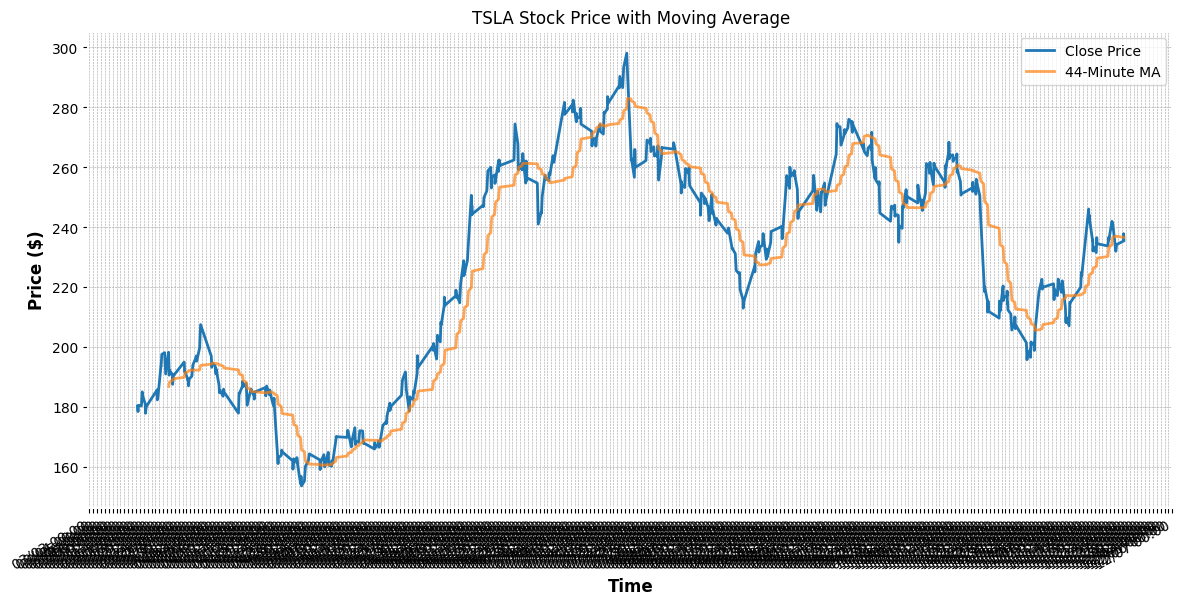

/Users/raman/miniconda3/envs/ExtFormer/lib/python3.9/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


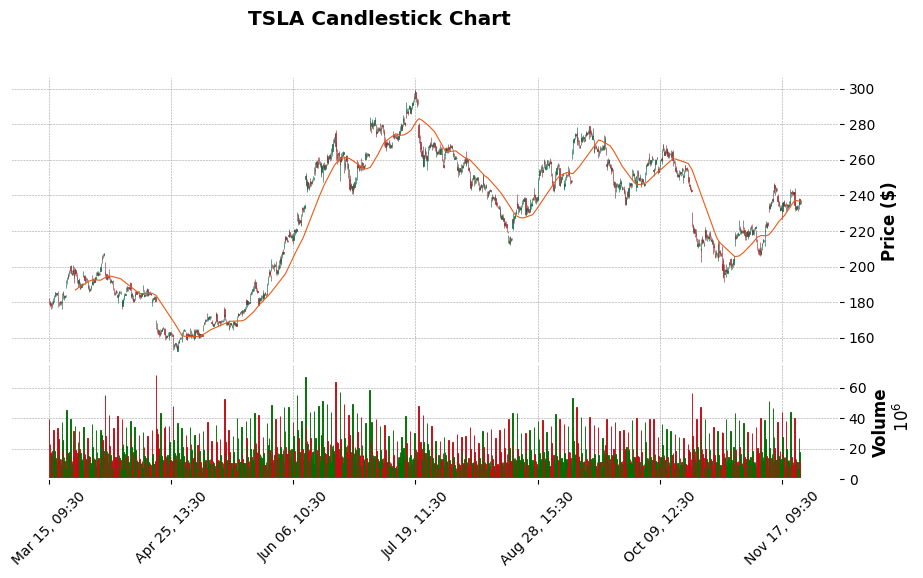

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf

# Download TSLA data for the specified days
tsla_data = yf.download('TSLA', start='2023-03-15', end='2023-11-25', interval='60m')

if not tsla_data.empty:
    # Calculate the 44-value moving average
    tsla_data['MA44'] = tsla_data['Close'].rolling(window=44).mean()

    # Set up the plot for moving average
    plt.figure(figsize=(14, 7))
    plt.plot(tsla_data.index, tsla_data['Close'], label='Close Price')
    plt.plot(tsla_data.index, tsla_data['MA44'], label='44-Minute MA', linewidth=2, alpha=0.7)

    # Formatting the date on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()  # Auto rotate date labels

    # Title and labels
    plt.title('TSLA Stock Price with Moving Average')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Set up the plot for candlestick, using mplfinance
    mpf.plot(tsla_data, type='candle', style='charles',
             title='TSLA Candlestick Chart',
             ylabel='Price ($)',
             ylabel_lower='Volume',
             figratio=(16, 8),
             volume=True,
             mav=(44))  # 44-period moving average
else:
    print("No data retrieved. Please check the ticker symbol and internet connection.")


In [4]:
import numpy as np

# FFT output provided
fft_output = np.array([-3.6266+0.0000j, -0.3123+1.7607j, -1.0473-1.1577j, 2.4668+1.3770j,
                       2.4668-1.3770j, -1.0473+1.1577j, -0.3123-1.7607j])

# Calculating magnitude and phase for each component
magnitude = np.abs(fft_output)
phase = np.angle(fft_output, deg=True)  # Phase in degrees

print("Magnitude:", magnitude)
print("Phase (degrees):", phase)


Magnitude: [3.6266     1.78818226 1.5611235  2.8251073  2.8251073  1.5611235
 1.78818226]
Phase (degrees): [ 180.          100.05809466 -132.13370683   29.17082576  -29.17082576
  132.13370683 -100.05809466]


In [6]:
import torch

A = torch.tensor([[1, 2], [3, 4], [5, 6]])
B = torch.tensor([[1, 2], [3, 1]])

result = torch.einsum('ij,jk->ij', [A, B])
print(result)


tensor([[ 3,  8],
        [ 9, 16],
        [15, 24]])


In [7]:
A

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [8]:
B

tensor([[1, 2],
        [3, 1]])

In [1]:
# Fabricated data
transactions = [
    ('AccountA', 'AccountB', {'amount': 100.0}),
    ('AccountB', 'AccountC', {'amount': 50.0}),
    ('AccountC', 'AccountA', {'amount': 30.0}),
    ('AccountD', 'AccountA', {'amount': 70.0}),
    ('AccountE', 'AccountD', {'amount': 120.0}),
]


In [8]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes (accounts)
G.add_nodes_from(['AccountA', 'AccountB', 'AccountC', 'AccountD', 'AccountE'])

# Add weighted edges (transactions)
G.add_edges_from(transactions)

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

print ("degree_centrality: ", degree_centrality)
# Identify nodes with high degree centrality (potentially influential)
fraudulent_accounts = [node for node, centrality in degree_centrality.items() if centrality > 0.2]

# Analyze communities within the graph
communities = list(nx.community.greedy_modularity_communities(G))

# Detect transactions between communities (potentially suspicious)
suspicious_transactions = []
for community in communities:
    subgraph = G.subgraph(community)
    edges = subgraph.edges(data=True)
    for edge in edges:
        sender, receiver, data = edge
        if sender not in community or receiver not in community:
            suspicious_transactions.append((sender, receiver, data))

# Print results
print("Potentially fraudulent accounts:", fraudulent_accounts)
print("Suspicious transactions:", suspicious_transactions)


degree_centrality:  {'AccountA': 0.75, 'AccountB': 0.5, 'AccountC': 0.5, 'AccountD': 0.5, 'AccountE': 0.25}
Potentially fraudulent accounts: ['AccountA', 'AccountB', 'AccountC', 'AccountD', 'AccountE']
Suspicious transactions: []


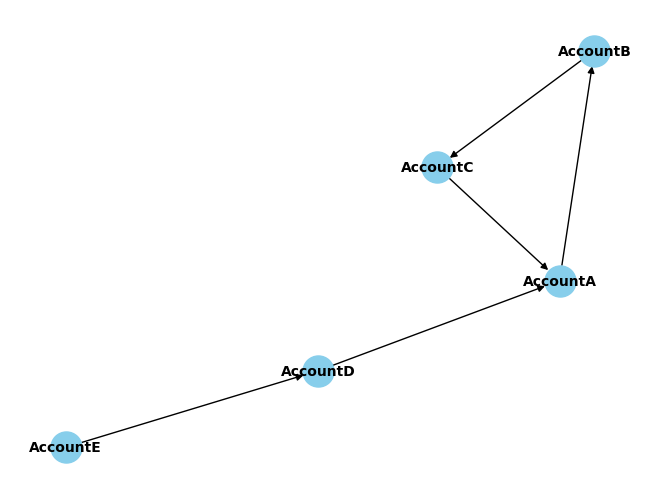

In [9]:
import matplotlib.pyplot as plt
# Draw the graph
nx.draw(G, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black', font_weight='bold')

# Display the graph
plt.show()
